# Lead prediction

## Imports

In [127]:
pip install pandas scikit-learn tensorflow matplotlib seaborn

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [129]:
# Drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
df = pd.read_csv('/content/drive/MyDrive/Leads X Education.csv')
df.shape

(9240, 37)

In [131]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [132]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

- **Prospect ID**: A unique ID with which the customer is identified.  
- **Lead Number**: A lead number assigned to each lead procured.  
- **Lead Origin**: The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.  
- **Lead Source**: The source of the lead. Includes Google, Organic Search, Olark Chat, etc.  
- **Do Not Email**: An indicator variable selected by the customer wherein they select whether or not they want to be emailed about the course.  
- **Do Not Call**: An indicator variable selected by the customer wherein they select whether or not they want to be called about the course.  
- **Converted**: The target variable. Indicates whether a lead has been successfully converted or not.  
- **TotalVisits**: The total number of visits made by the customer on the website.  
- **Total Time Spent on Website**: The total time spent by the customer on the website.  
- **Page Views Per Visit**: Average number of pages on the website viewed during the visits.  
- **Last Activity**: Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.  
- **Country**: The country of the customer.  
- **Specialization**: The industry domain in which the customer worked before. Includes the level 'Select Specialization', which means the customer had not selected this option while filling the form.  
- **How did you hear about X Education**: The source from which the customer heard about X Education.  
- **What is your current occupation**: Indicates whether the customer is a student, unemployed, or employed.  
- **What matters most to you in choosing this course**: An option selected by the customer indicating their main motto behind doing this course.  
- **Search**: Indicates whether the customer had seen the ad in any of the listed items.  
- **Magazine**: Indicates whether the customer had seen the ad in a magazine.  
- **Newspaper Article**: Indicates whether the customer had seen the ad in a newspaper article.  
- **X Education Forums**: Indicates whether the customer had seen the ad in X Education Forums.  
- **Newspaper**: Indicates whether the customer had seen the ad in a newspaper.  
- **Digital Advertisement**: Indicates whether the customer had seen the ad in a digital advertisement.  
- **Through Recommendations**: Indicates whether the customer came in through recommendations.  
- **Receive More Updates About Our Courses**: Indicates whether the customer chose to receive more updates about the courses.  
- **Tags**: Tags assigned to customers indicating the current status of the lead.  
- **Lead Quality**: Indicates the quality of the lead based on data and intuition from the employee assigned to the lead.  
- **Update me on Supply Chain Content**: Indicates whether the customer wants updates on Supply Chain Content.  
- **Get updates on DM Content**: Indicates whether the customer wants updates on DM Content.  
- **Lead Profile**: A lead level assigned to each customer based on their profile.  
- **City**: The city of the customer.  
- **Asymmetrique Activity Index**: An index and score assigned to each customer based on their activity and profile.  
- **Asymmetrique Profile Index**: An index and score assigned to each customer based on their profile.  
- **Asymmetrique Activity Score**: A score assigned to each customer based on their activity.  
- **Asymmetrique Profile Score**: A score assigned to each customer based on their profile.  
- **I agree to pay the amount through cheque**: Indicates whether the customer has agreed to pay the amount through cheque.  
- **A free copy of Mastering The Interview**: Indicates whether the customer wants a free copy of 'Mastering the Interview'.  
- **Last Notable Activity**: The last notable activity performed by the student.  


As seen in this text, we will use the `Converted` feature as target variable

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Judging by the data, we will have to manipulate it and preprocess it to avoid nulls, labels and type problems

In [134]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


We will most likely need standardization to fix the magnitude differences

## Data prep.

### Nulls and Default entries

In [135]:
df.duplicated().any()

False

In [136]:
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


Before removing nulls, we will check if any columns have useless default entries

In [137]:
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')


Prospect ID: 9240
Lead Number: 9240
Lead Origin: 5
Lead Source: 21
Do Not Email: 2
Do Not Call: 2
Converted: 2
TotalVisits: 41
Total Time Spent on Website: 1731
Page Views Per Visit: 114
Last Activity: 17
Country: 38
Specialization: 19
How did you hear about X Education: 10
What is your current occupation: 6
What matters most to you in choosing a course: 3
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 26
Lead Quality: 5
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
Lead Profile: 6
City: 7
Asymmetrique Activity Index: 3
Asymmetrique Profile Index: 3
Asymmetrique Activity Score: 12
Asymmetrique Profile Score: 10
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [138]:
for col in df.columns:
    if df[col].nunique() < 30: # Arbitrary number to avoid checking for columns like Total Time Spent on Website
        print(f'{col}: {df[col].unique()}')


Lead Origin: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email: ['No' 'Yes']
Do Not Call: ['No' 'Yes']
Converted: [0 1]
Last Activity: ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
Specialization: ['Select' 'Business Administration' 'Media and Advertising' nan
 'Supply Chain Management' 'IT Projects Management' 'Finance Mana

`Select` seems to be a NaN undercover

In [139]:
import numpy as np
df.replace('Select', np.nan, inplace=True)

In [140]:
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [141]:
f"Dropping rows with nulls will affect {df.isnull().any(axis=1).sum()} rows"

'Dropping rows with nulls will affect 8942 rows'

Let's get rid of columns instead

In [142]:
to_drop = df.columns[df.isnull().mean() > 0.3] # If it has more than 30% (arbitrary)
f"Dropping {len(to_drop)} columns. Here is the list: {to_drop}"

"Dropping 10 columns. Here is the list: Index(['Specialization', 'How did you hear about X Education', 'Tags',\n       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',\n       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',\n       'Asymmetrique Profile Score'],\n      dtype='object')"

In [143]:
df.drop(to_drop, axis=1, inplace=True)

Let's check manually now each column

In [144]:
f'Remaining columns with NaN values: {df.columns[df.isnull().any()]}'

"Remaining columns with NaN values: Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',\n       'Country', 'What is your current occupation',\n       'What matters most to you in choosing a course'],\n      dtype='object')"

In [145]:
to_drop = []
to_drop.append('Prospect ID') # We know by defition they are useless
to_drop.append('Lead Number')

In [146]:
df['Lead Source'].value_counts(dropna = False, normalize = True).mul(100).round(2)

,proportion
Lead Source,
Google,31.04
Direct Traffic,27.52
Olark Chat,18.99
Organic Search,12.49
Reference,5.78
Welingak Website,1.54
Referral Sites,1.35
Facebook,0.60
NaN,0.39


We will change google to Google and NaN to Google as it is the biggest

In [147]:
df['Lead Source'].replace('google', 'Google', inplace = True)
df['Lead Source'].fillna('Google', inplace = True)

<ipython-input-147-1727ac67152c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lead Source'].replace('google', 'Google', inplace = True)
<ipython-input-147-1727ac67152c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

We will also put all the options lower than 1% in Other

In [148]:
lower_than_one = df['Lead Source'].value_counts(normalize = True).mul(100).round(2).lt(1)
lower_than_one = lower_than_one[lower_than_one].index.tolist()
df['Lead Source'].replace(lower_than_one, 'Other', inplace = True)

df['Lead Source'].value_counts(dropna = False, normalize = True).mul(100).round(2)

,proportion
Lead Source,
Google,31.48
Direct Traffic,27.52
Olark Chat,18.99
Organic Search,12.49
Reference,5.78
Welingak Website,1.54
Referral Sites,1.35
Other,0.84


In [149]:
df['TotalVisits'].value_counts(dropna = False, normalize = True).mul(100).round(2)

,proportion
TotalVisits,
0.0,23.69
2.0,18.18
3.0,14.13
4.0,12.12
5.0,8.47
6.0,5.04
1.0,4.27
7.0,3.34
8.0,2.42


Add median instead


In [150]:
df['TotalVisits'].fillna(df['TotalVisits'].median(),  inplace = True)

<ipython-input-150-8611cd9dd35f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalVisits'].fillna(df['TotalVisits'].median(),  inplace = True)


In [151]:
df['Page Views Per Visit'].value_counts(dropna = False, normalize = True).mul(100).round(2)

,proportion
Page Views Per Visit,
0.00,23.69
2.00,19.43
3.00,12.94
4.00,9.70
1.00,7.05
...,...
2.56,0.01
6.33,0.01
1.64,0.01


Same, we add median


In [152]:
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace = True)

<ipython-input-152-fe662e87f459>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace = True)


In [153]:
df['Last Activity'].value_counts(dropna = False, normalize = True).mul(100).round(2)

,proportion
Last Activity,
Email Opened,37.20
SMS Sent,29.71
Olark Chat Conversation,10.53
Page Visited on Website,6.93
Converted to Lead,4.63
Email Bounced,3.53
Email Link Clicked,2.89
Form Submitted on Website,1.26
NaN,1.11


Same as `Lead Source`, the NaN proportion is unsignificant

In [154]:
df['Last Activity'].fillna('Email Opened', inplace = True)

<ipython-input-154-4b8df95e5b7b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Last Activity'].fillna('Email Opened', inplace = True)


We will replace the lowest values by Other

In [155]:
lower_than_one = df['Last Activity'].value_counts(normalize = True).mul(100).round(2).lt(1)
lower_than_one = lower_than_one[lower_than_one].index.tolist()
df['Last Activity'].replace(lower_than_one, 'Other', inplace = True)

df['Last Activity'].value_counts(dropna = False, normalize = True).mul(100).round(2)

,proportion
Last Activity,
Email Opened,38.31
SMS Sent,29.71
Olark Chat Conversation,10.53
Page Visited on Website,6.93
Converted to Lead,4.63
Email Bounced,3.53
Email Link Clicked,2.89
Form Submitted on Website,1.26
Other,1.21


In [156]:
df['Country'].value_counts(dropna = False, normalize = True).mul(100).round(2)

,proportion
Country,
India,70.26
NaN,26.63
United States,0.75
United Arab Emirates,0.57
Singapore,0.26
Saudi Arabia,0.23
United Kingdom,0.16
Australia,0.14
Qatar,0.11


`Country` clearly looks unusable, we'll get rid of it

In [157]:
to_drop.append('Country')

In [158]:
df['What matters most to you in choosing a course'].value_counts(dropna = False, normalize = True).mul(100).round(2)

,proportion
What matters most to you in choosing a course,
Better Career Prospects,70.65
NaN,29.32
Flexibility & Convenience,0.02
Other,0.01


Same as `Country`, we will get rid of `What matters most to you in choosing a course` as only 0.03% is not a NaN or the other option.

In [159]:
to_drop.append('What matters most to you in choosing a course')

In [160]:
df['What is your current occupation'].value_counts(dropna = False, normalize = True).mul(100).round(2)

,proportion
What is your current occupation,
Unemployed,60.61
NaN,29.11
Working Professional,7.64
Student,2.27
Other,0.17
Housewife,0.11
Businessman,0.09


We will also get rid of `What is your current occupation` for the same reasons.

In [161]:
to_drop.append('What is your current occupation')

In [162]:
to_drop

['Prospect ID',
 'Lead Number',
 'Country',
 'What matters most to you in choosing a course',
 'What is your current occupation']

In [163]:
to_drop

['Prospect ID',
 'Lead Number',
 'Country',
 'What matters most to you in choosing a course',
 'What is your current occupation']

In [164]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [165]:
df.drop(to_drop, axis=1, inplace=True)

In [166]:
df.isna().any()

,0
Lead Origin,False
Lead Source,False
Do Not Email,False
Do Not Call,False
Converted,False
TotalVisits,False
Total Time Spent on Website,False
Page Views Per Visit,False
Last Activity,False
Search,False


### Outliers

In [167]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

We will check for `TotalVisits`, `Total Time Spent on Website` and `Page Views Per Visit` as `Converted` is a binary type

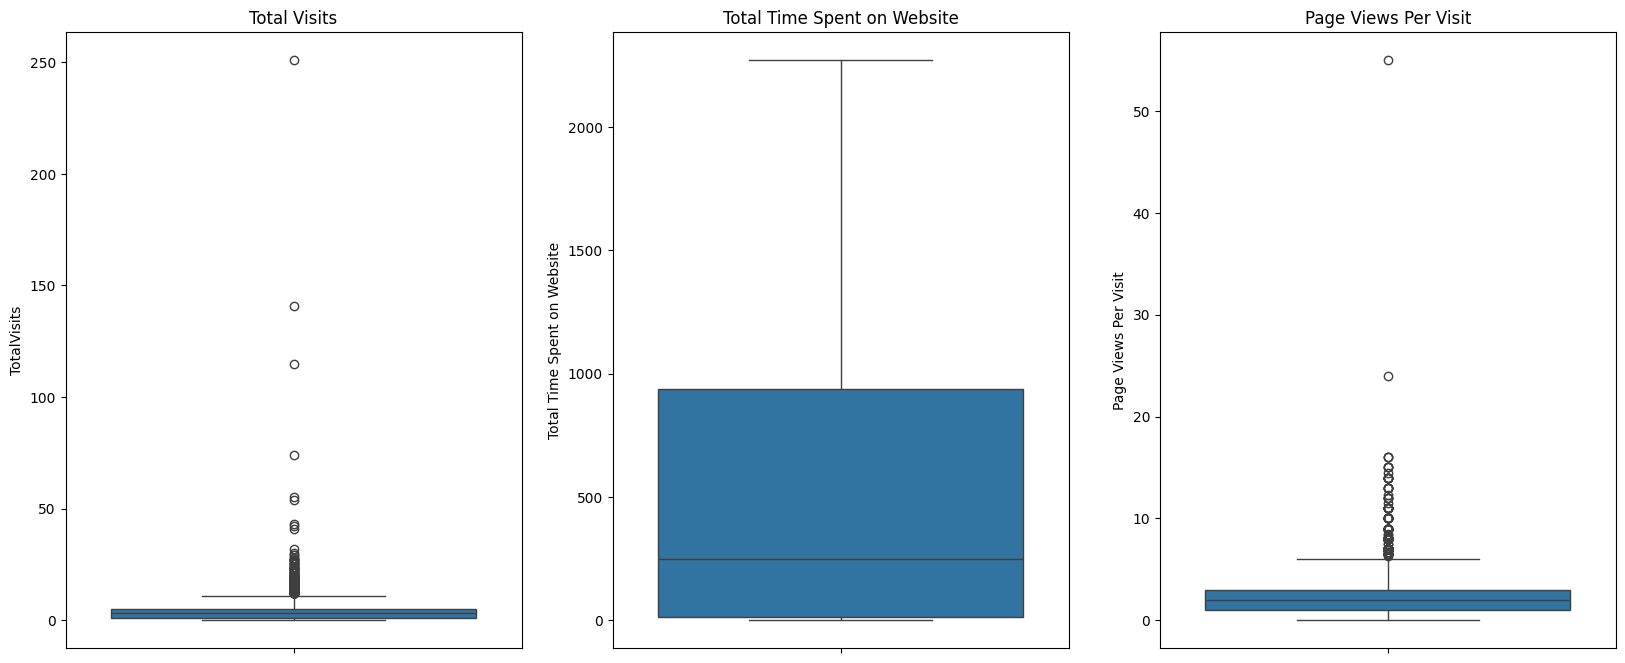

In [168]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['TotalVisits'])
plt.title('Total Visits')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.show()

- `Total Time Spent on Website` seems fine
- `Total Visits` & `Page Views Per Visit` seems to have quite some points after the 3rd quartile.

In [169]:
df[df['TotalVisits'] > df['TotalVisits'].quantile(0.9)].shape[0], df[df['Page Views Per Visit'] > df['Page Views Per Visit'].quantile(0.9)].shape[0]


(855, 634)

In [170]:
df[df['TotalVisits'] > df['TotalVisits'].quantile(0.99)].shape[0], df[df['Page Views Per Visit'] > df['Page Views Per Visit'].quantile(0.99)].shape[0]


(83, 75)

In [171]:
df[df['TotalVisits'] > df['TotalVisits'].quantile(0.995)].shape[0], df[df['Page Views Per Visit'] > df['Page Views Per Visit'].quantile(0.995)].shape[0]

(47, 32)

We will get rid of data past .995

In [172]:
df = df[df['TotalVisits'] <= df['TotalVisits'].quantile(0.995)]
df = df[df['Page Views Per Visit'] <= df['Page Views Per Visit'].quantile(0.995)]

df.shape

(9149, 22)

## EDA

### Numerical

In [173]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

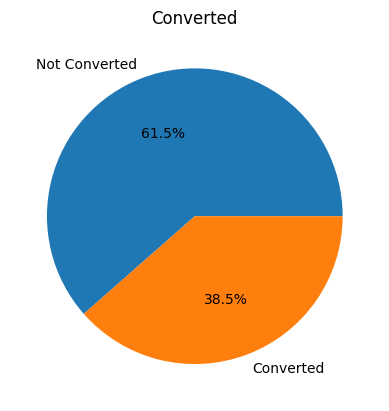

In [174]:
plt.pie(df['Converted'].value_counts(), labels=['Not Converted', 'Converted'], autopct='%1.1f%%')
plt.title('Converted')
plt.show()

`Converted` seems not balanced. In reality, this would make sense as the main goal of this notebook| is to correct this imbalance or reverse it.

In [175]:
def converted_ratio(feature: str, converted_feature: str, df: pd.DataFrame) -> pd.Series:
    """Returns the ratio of converted per unique values in a feature"""
    return df.groupby(feature)[converted_feature].mean()

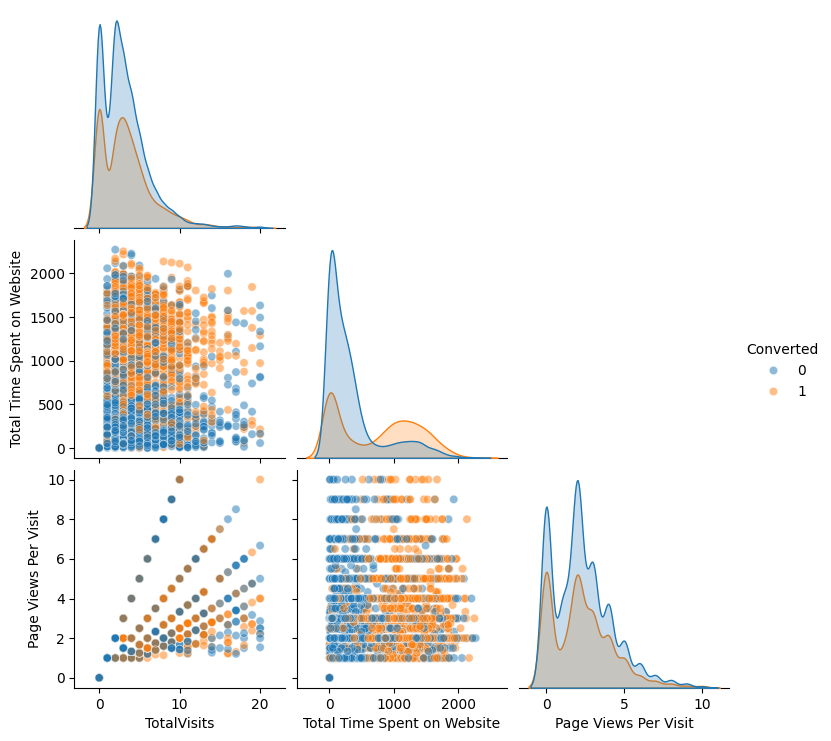

In [176]:
sns.pairplot(df[numerical_cols], hue = 'Converted', corner = True, plot_kws = {'alpha': 0.5})

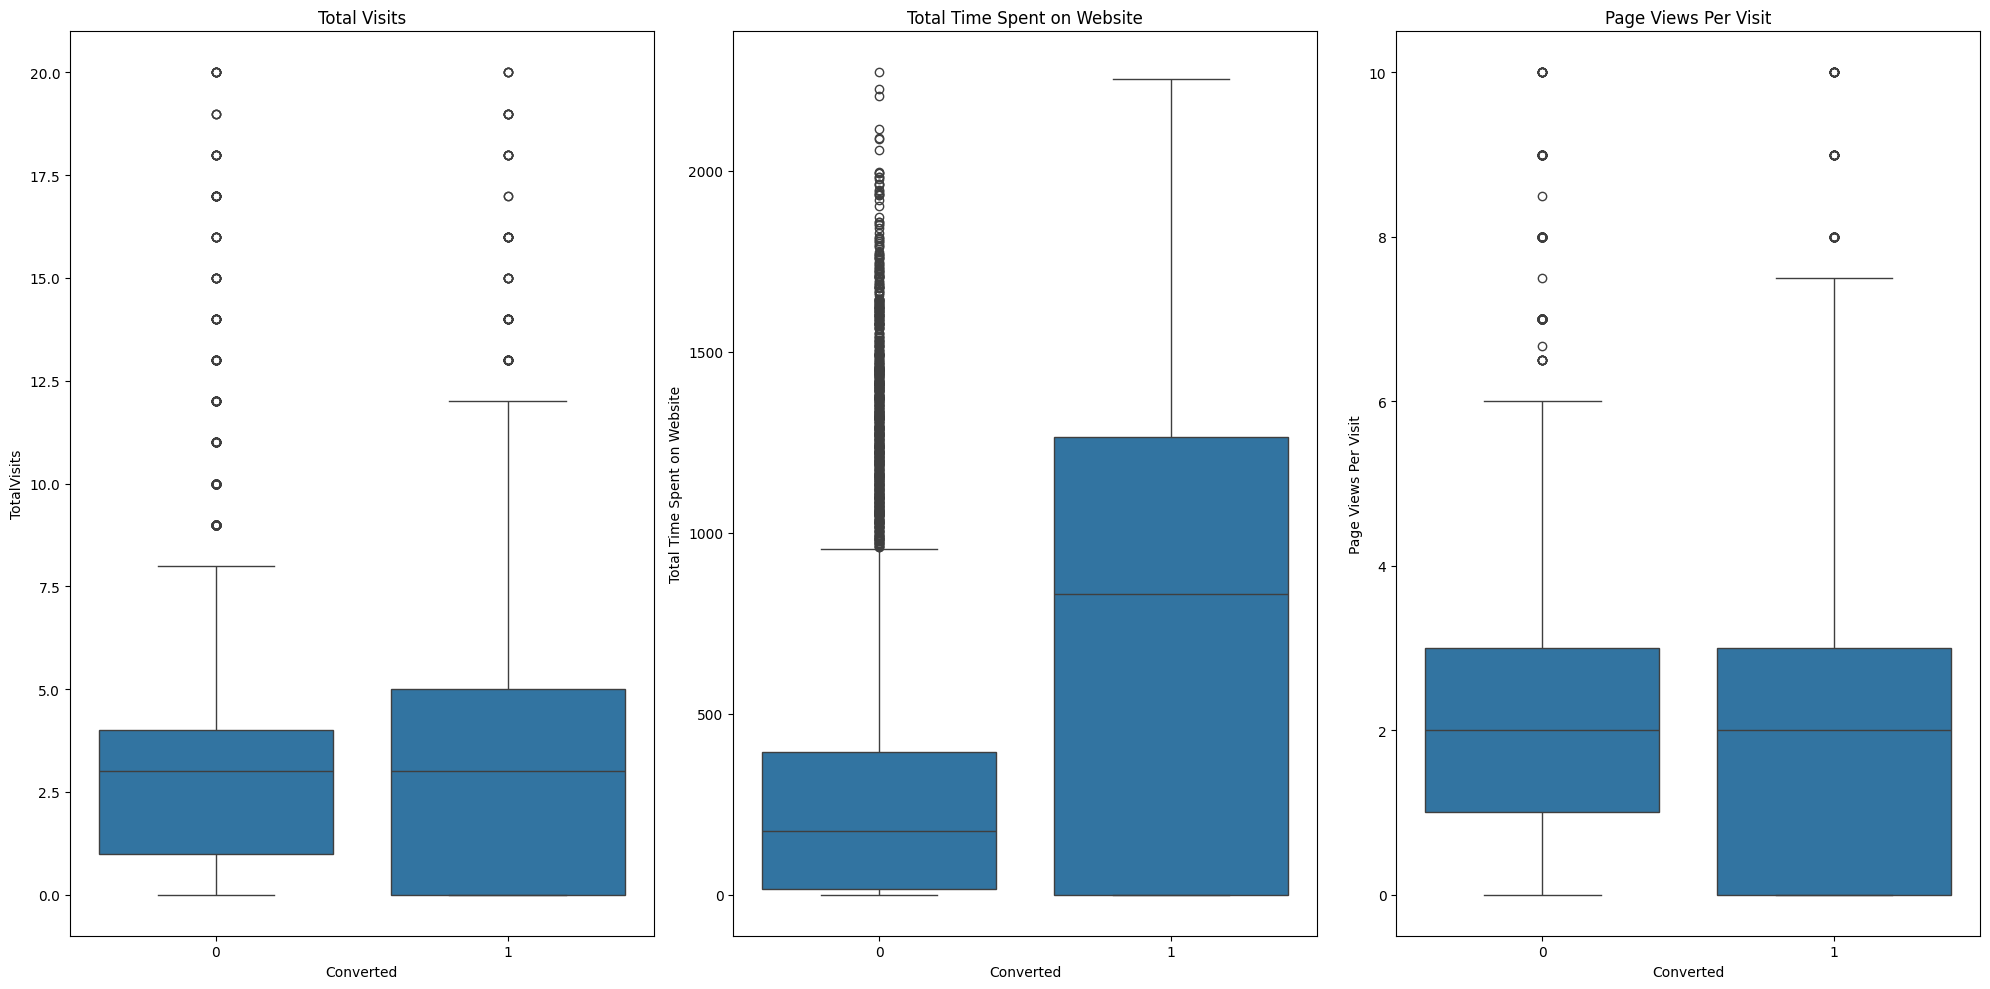

In [177]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Converted'], y=df['TotalVisits'])
plt.title('Total Visits')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Converted'], y=df['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Converted'], y=df['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.tight_layout()

Out of all the features, `Total Time Spent on Website` seems to be the one which shows a behavioural difference between Converted and Not Converted. In fact, if someone spends more time on this ressource, the bigger the probability to become a successful lead. Companies should use this information to allocate more ressources to the team who are responsable of making an interesting website.

### Categorical columns

In [178]:
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

In [179]:
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
binary_cols

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [180]:
non_binary_cols = [col for col in categorical_cols if col not in binary_cols]
non_binary_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Last Notable Activity']

#### Binary features

In [181]:
len(binary_cols)

9

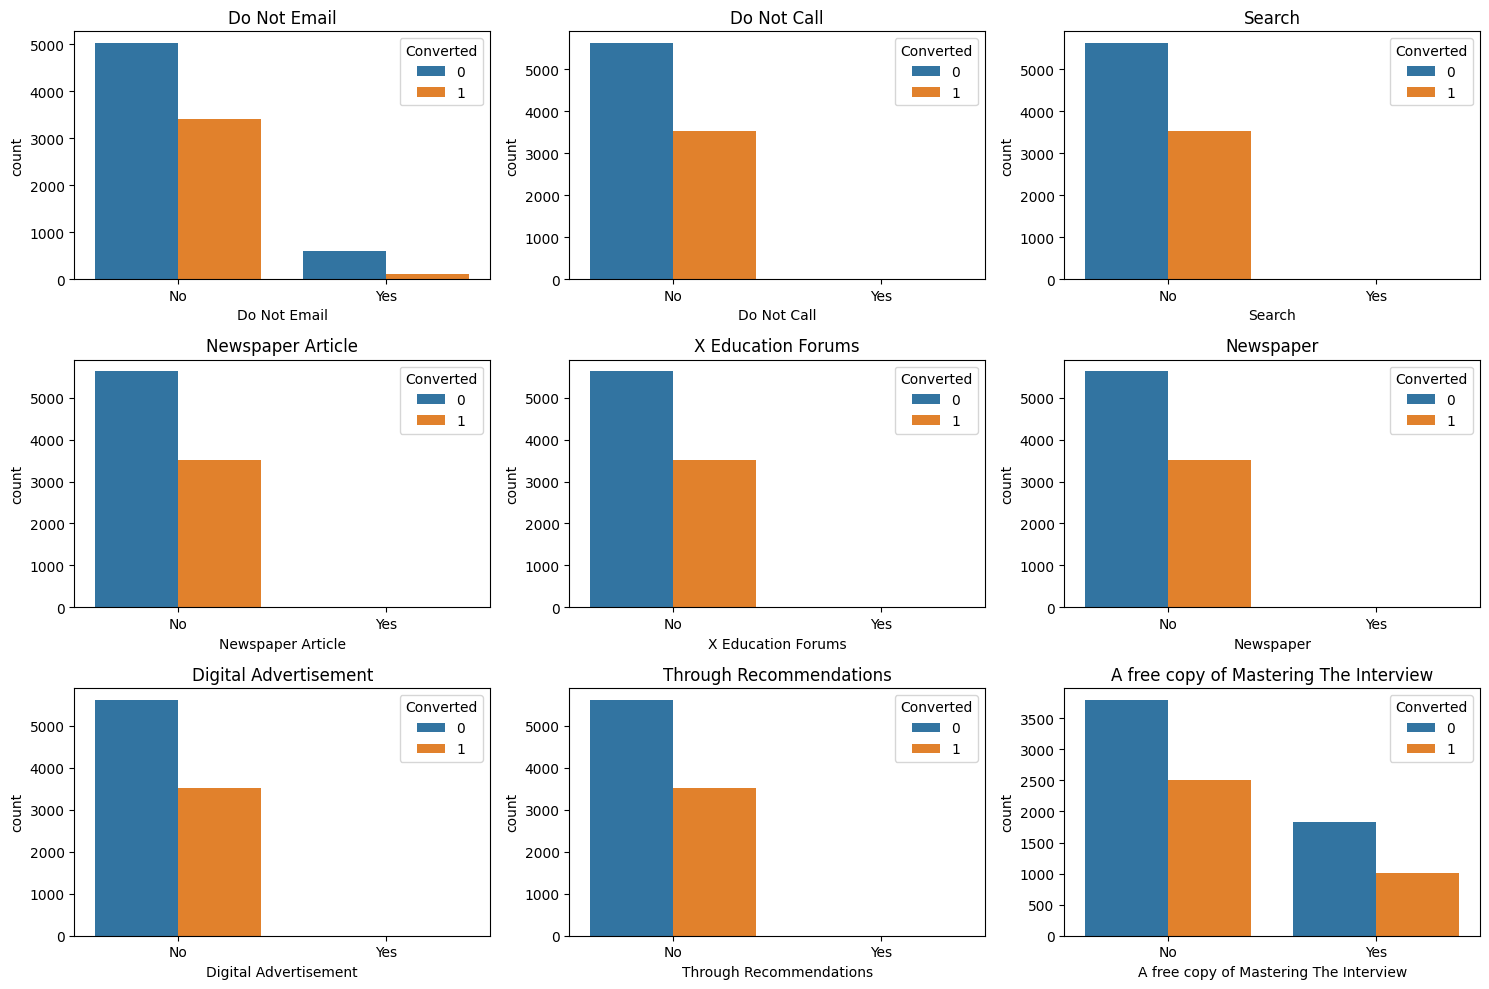

In [182]:
plt.figure(figsize=(15, 10))

for col in binary_cols:
    plt.subplot(3, 3, binary_cols.index(col) + 1)
    sns.countplot(x=col, hue='Converted', data=df)
    plt.title(col)

plt.tight_layout()

These binary features seem to follow a set pattern, we should perform a **correlation analysis** later

#### Non Binary features

Text(0.5, 1.0, 'Lead Origin Converted Ratio')

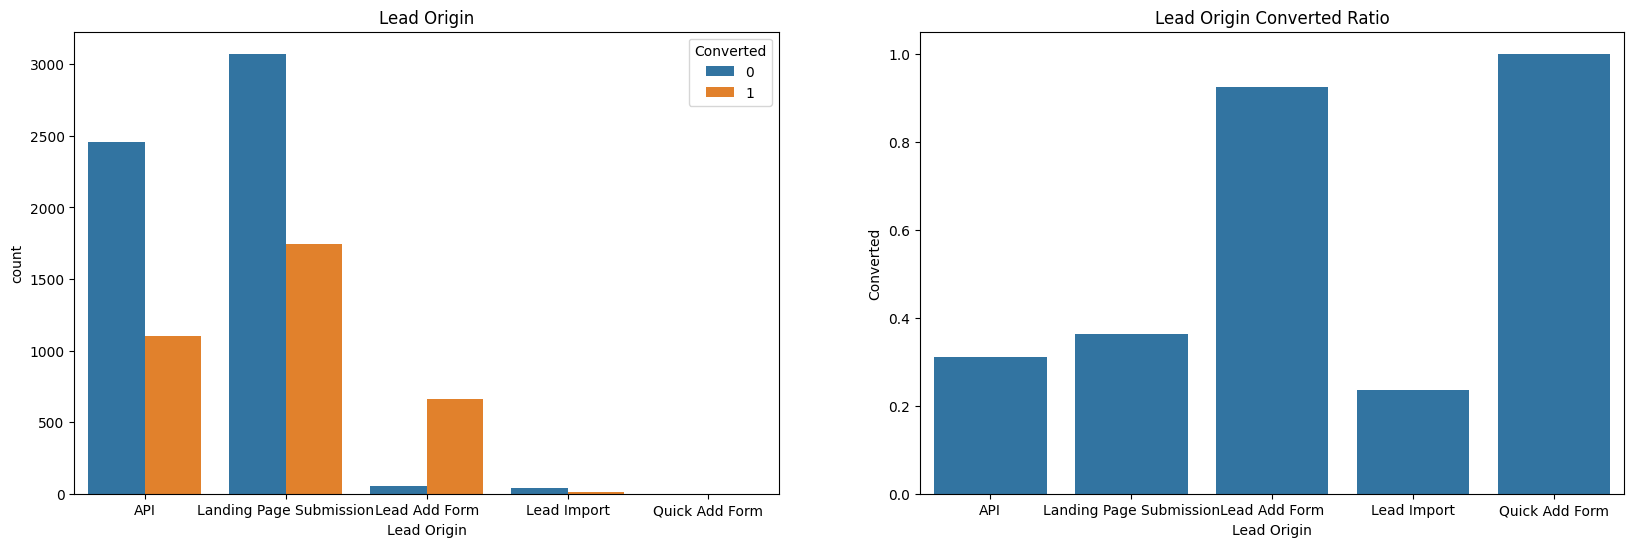

In [183]:
col = non_binary_cols[0]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=col, hue='Converted', data=df)
plt.title(col)

plt.subplot(1, 2, 2)
sns.barplot(x=converted_ratio(col, 'Converted', df).index, y=converted_ratio(col, 'Converted', df))
plt.title(col + ' Converted Ratio')

Purely based on the `Lead Origin`, API and Landing Page Submission seems to attract attention but doesn't have success rate that looks good. In fact, Lead Add Form has greater performance for the amount of attraction

`Quick Add Form` seems ridiculously low, let's add it to `Lead Add Form`

In [184]:
df['Lead Origin'].replace('Quick Add Form', 'Lead Add Form', inplace=True)

<ipython-input-184-a11c1b032e54>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lead Origin'].replace('Quick Add Form', 'Lead Add Form', inplace=True)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Direct Traffic'),
  Text(1, 0, 'Google'),
  Text(2, 0, 'Olark Chat'),
  Text(3, 0, 'Organic Search'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Referral Sites'),
  Text(7, 0, 'Welingak Website')])

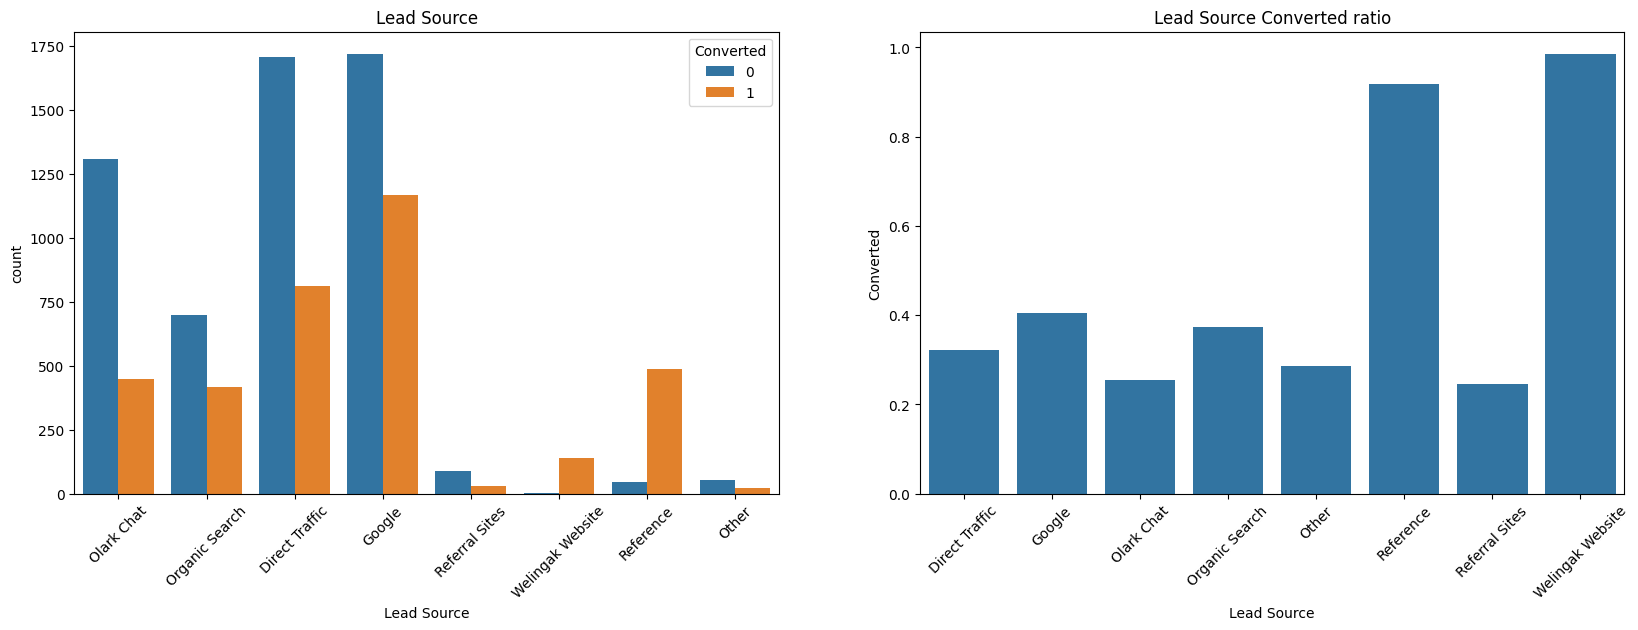

In [185]:
col = non_binary_cols[1]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=col, hue='Converted', data=df)
plt.title(col)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=converted_ratio(col, 'Converted', df).index, y=converted_ratio(col, 'Converted', df))
plt.title(col + ' Converted ratio')
plt.xticks(rotation=45)

`Reference` and `Welingak` are very successful, the conversion ratio is very high

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Converted to Lead'),
  Text(1, 0, 'Email Bounced'),
  Text(2, 0, 'Email Link Clicked'),
  Text(3, 0, 'Email Opened'),
  Text(4, 0, 'Form Submitted on Website'),
  Text(5, 0, 'Olark Chat Conversation'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Page Visited on Website'),
  Text(8, 0, 'SMS Sent'),
  Text(9, 0, 'Unreachable')])

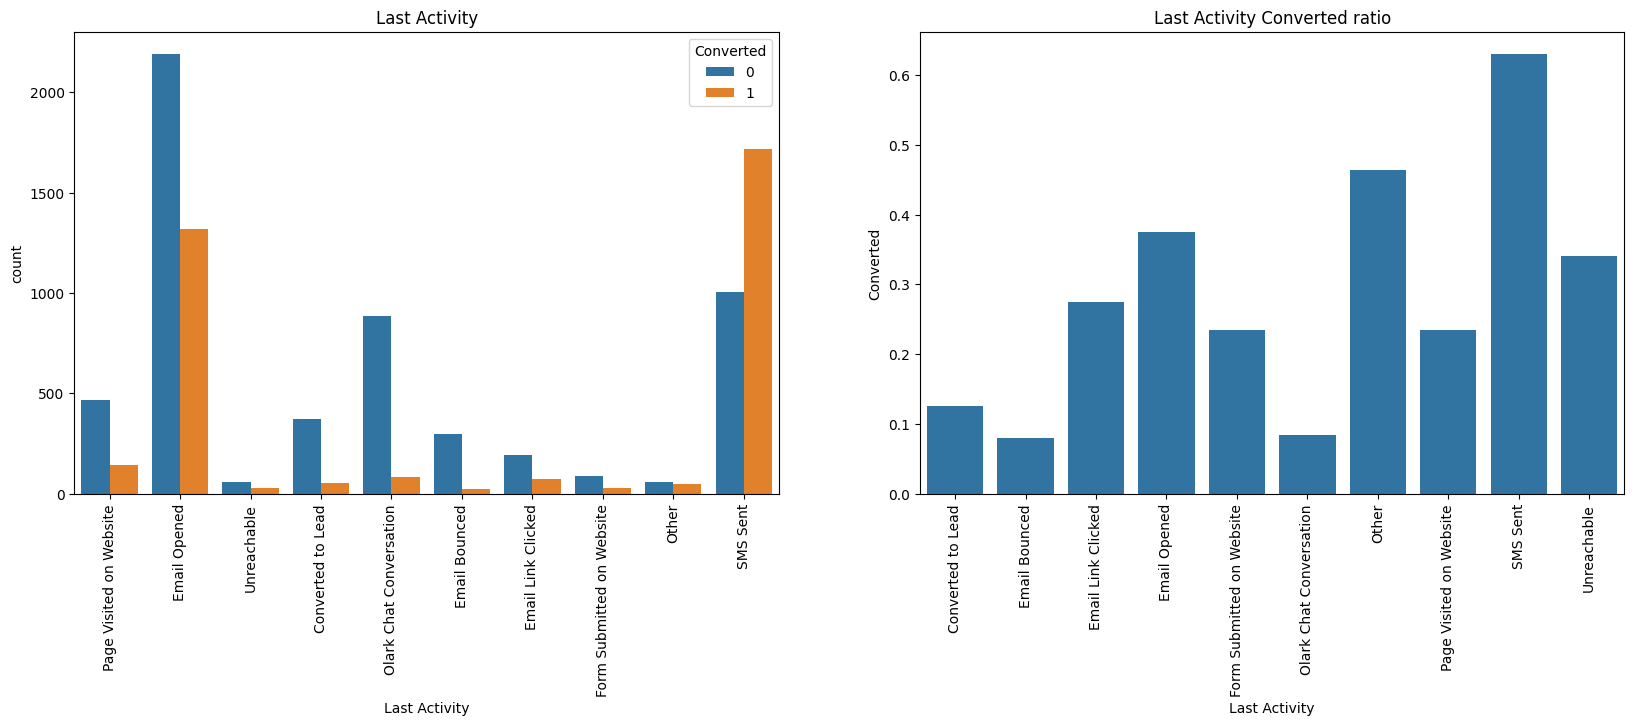

In [186]:
col = non_binary_cols[2]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=col, hue='Converted', data=df)
plt.title(col)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=converted_ratio(col, 'Converted', df).index, y=converted_ratio(col, 'Converted', df))
plt.title(col + ' Converted ratio')
plt.xticks(rotation=90)

SMS seem to be the greatest technique to get activity from converted leads. On the other hand, email stands at the top of the pile for everybody (most common form of eaching out to somebody in the professional field)

([0], [Text(0, 0, 'No')])

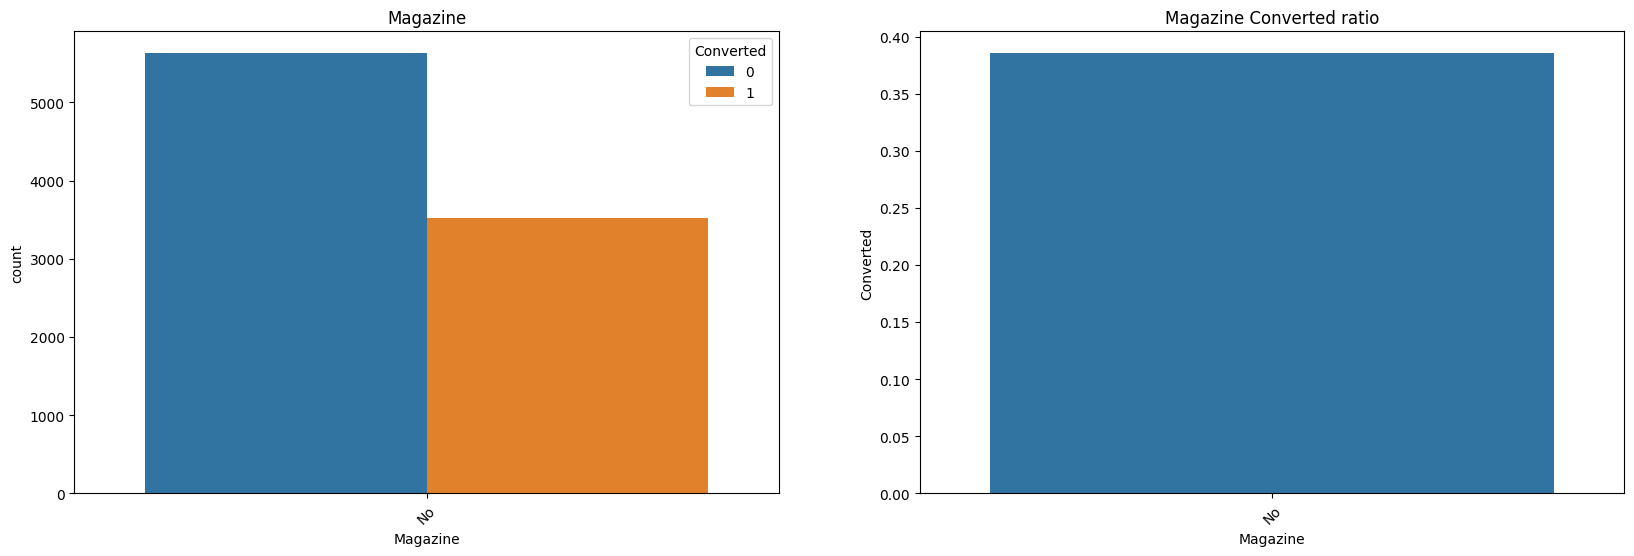

In [187]:
col = non_binary_cols[3]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=col, hue='Converted', data=df)
plt.title(col)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=converted_ratio(col, 'Converted', df).index, y=converted_ratio(col, 'Converted', df))
plt.title(col + ' Converted ratio')
plt.xticks(rotation=45)

We will get of this single value feature

In [188]:
to_drop = [col]

([0], [Text(0, 0, 'No')])

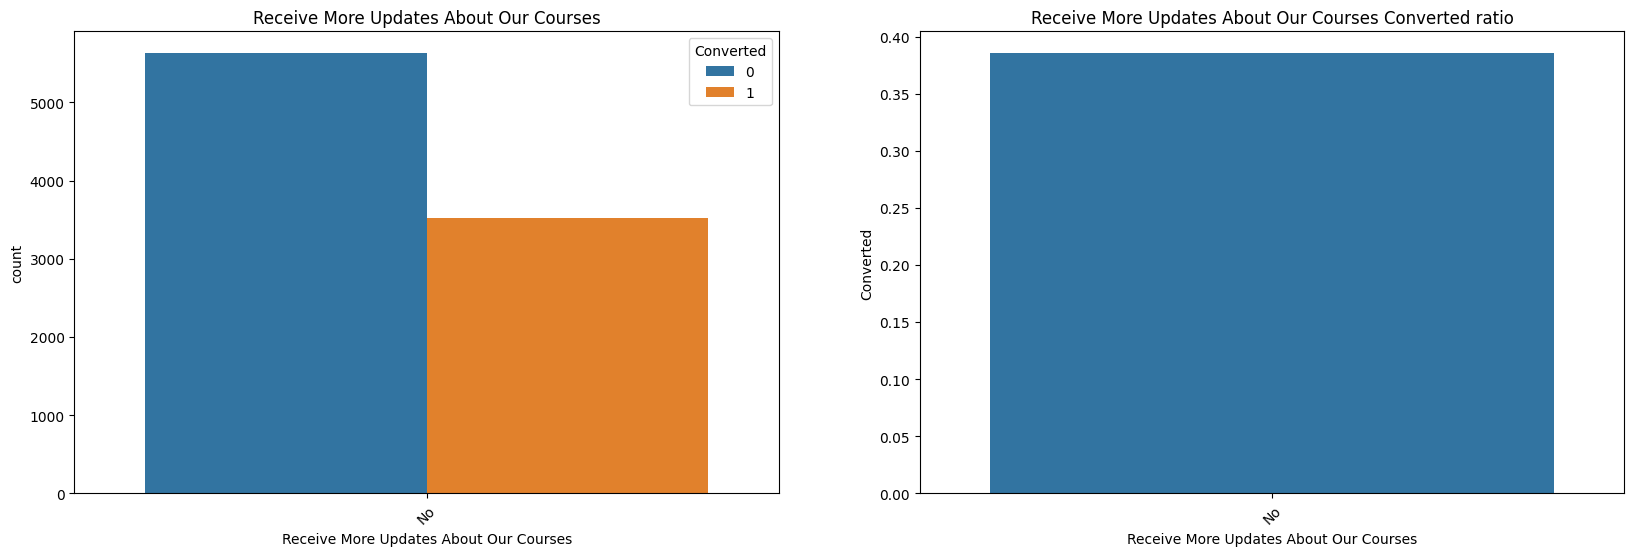

In [189]:
col = non_binary_cols[4]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=col, hue='Converted', data=df)
plt.title(col)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=converted_ratio(col, 'Converted', df).index, y=converted_ratio(col, 'Converted', df))
plt.title(col + ' Converted ratio')
plt.xticks(rotation=45)

In [190]:
to_drop.append(col)
to_drop

['Magazine', 'Receive More Updates About Our Courses']

([0], [Text(0, 0, 'No')])

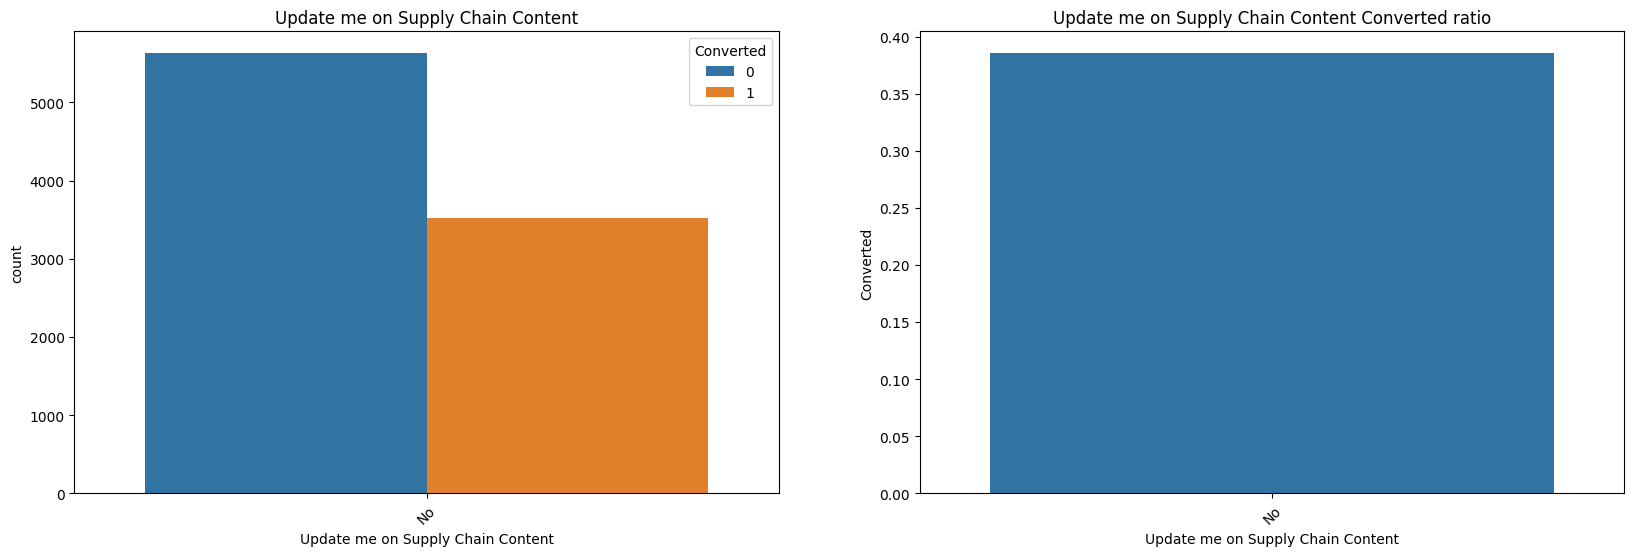

In [191]:
col = non_binary_cols[5]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=col, hue='Converted', data=df)
plt.title(col)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=converted_ratio(col, 'Converted', df).index, y=converted_ratio(col, 'Converted', df))
plt.title(col + ' Converted ratio')
plt.xticks(rotation=45)

In [192]:
to_drop.append(col)
to_drop


['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content']

([0], [Text(0, 0, 'No')])

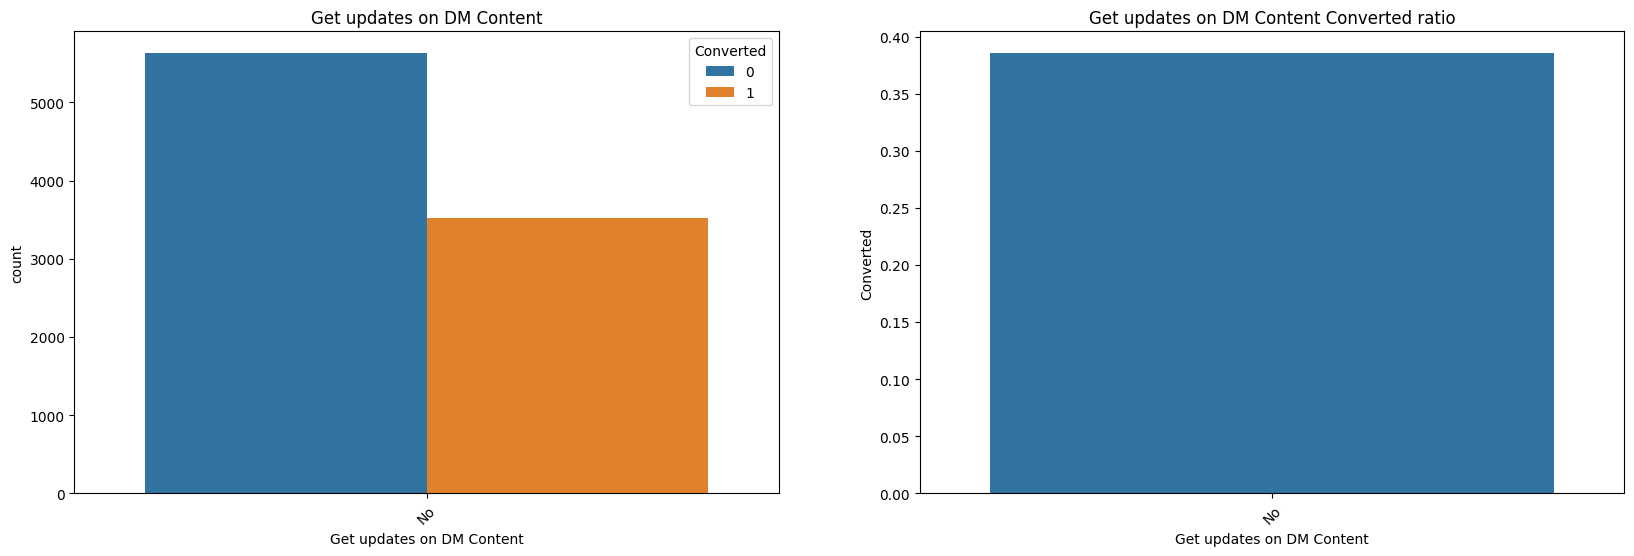

In [193]:
col = non_binary_cols[6]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=col, hue='Converted', data=df)
plt.title(col)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=converted_ratio(col, 'Converted', df).index, y=converted_ratio(col, 'Converted', df))
plt.title(col + ' Converted ratio')
plt.xticks(rotation=45)

In [194]:
to_drop.append(col)
to_drop

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content']

([0], [Text(0, 0, 'No')])

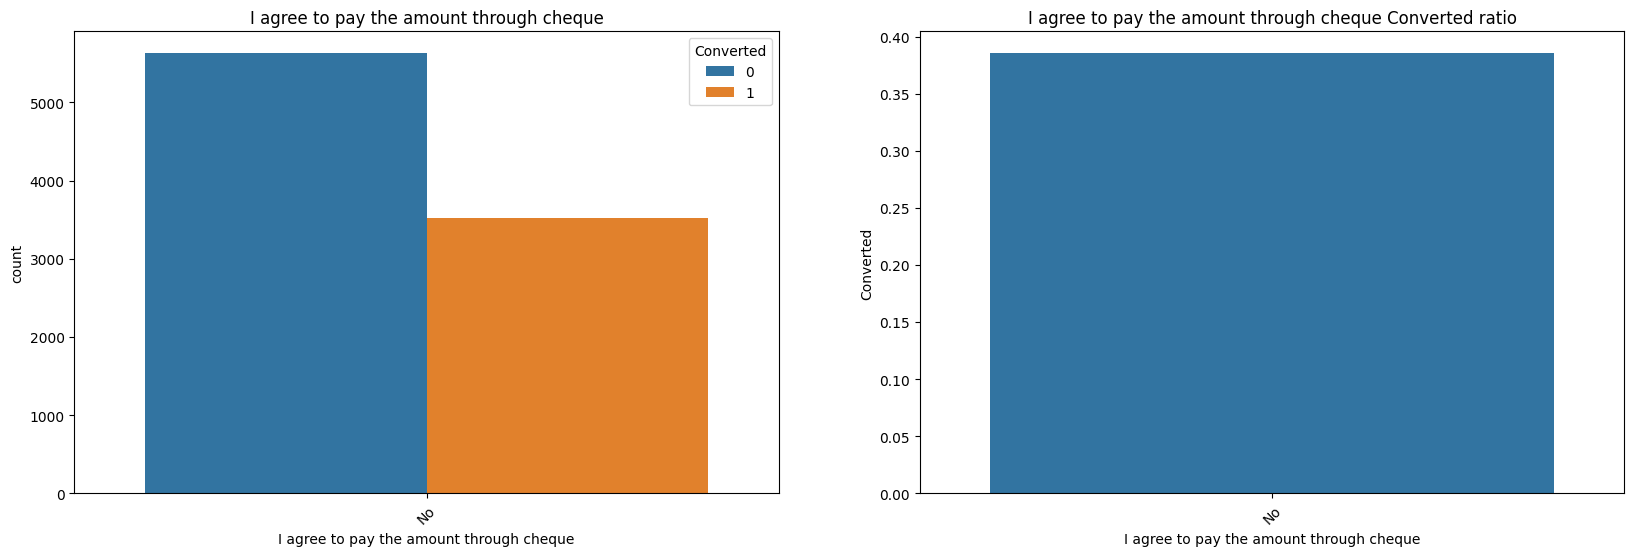

In [195]:
col = non_binary_cols[7]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=col, hue='Converted', data=df)
plt.title(col)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=converted_ratio(col, 'Converted', df).index, y=converted_ratio(col, 'Converted', df))
plt.title(col + ' Converted ratio')
plt.xticks(rotation=45)

In [196]:
to_drop.append(col)
to_drop

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Approached upfront'),
  Text(1, 0, 'Email Bounced'),
  Text(2, 0, 'Email Link Clicked'),
  Text(3, 0, 'Email Marked Spam'),
  Text(4, 0, 'Email Opened'),
  Text(5, 0, 'Email Received'),
  Text(6, 0, 'Form Submitted on Website'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Modified'),
  Text(9, 0, 'Olark Chat Conversation'),
  Text(10, 0, 'Page Visited on Website'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'SMS Sent'),
  Text(13, 0, 'Unreachable'),
  Text(14, 0, 'Unsubscribed'),
  Text(15, 0, 'View in browser link Clicked')])

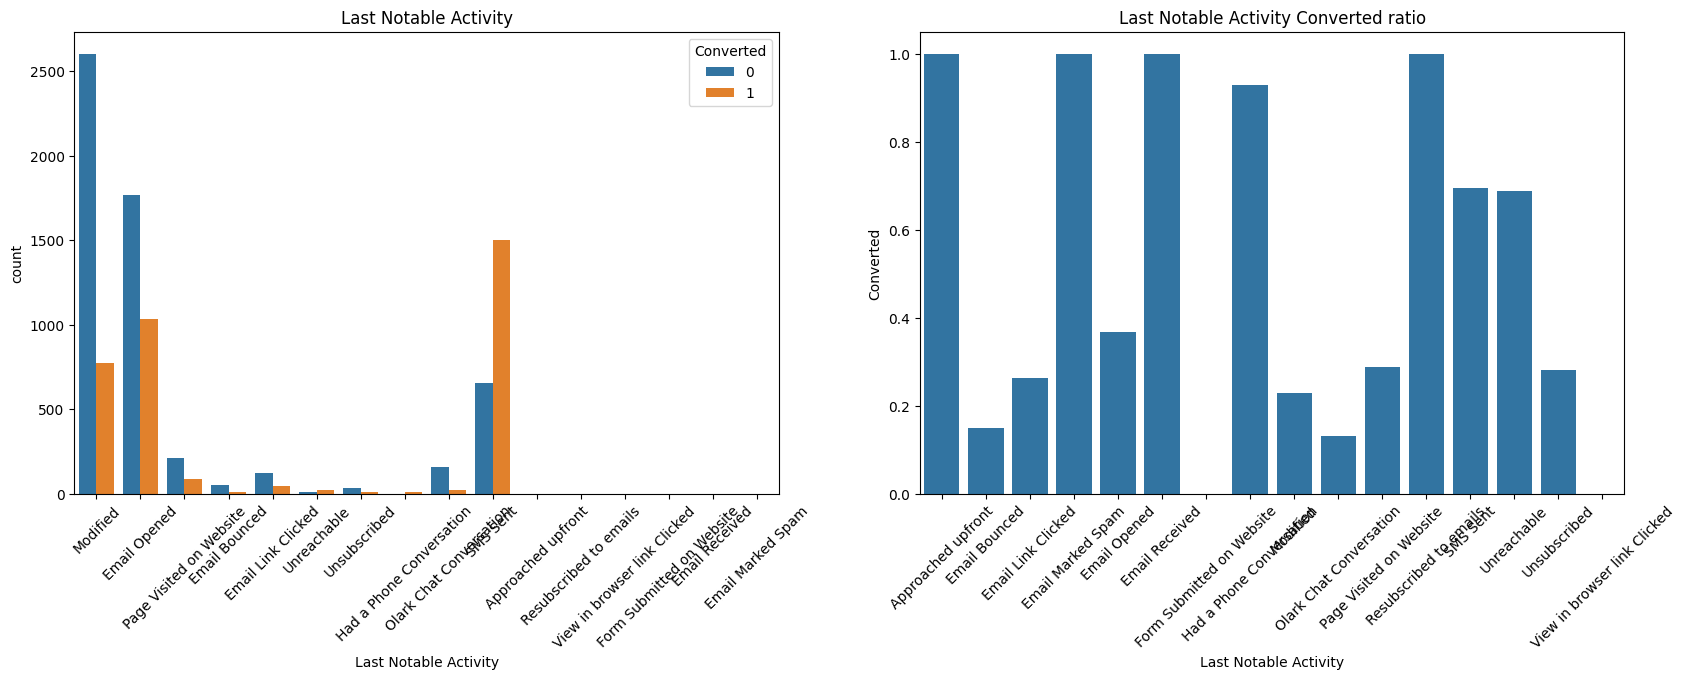

In [197]:
col = non_binary_cols[8]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=col, hue='Converted', data=df)
plt.title(col)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=converted_ratio(col, 'Converted', df).index, y=converted_ratio(col, 'Converted', df))
plt.title(col + ' Converted ratio')
plt.xticks(rotation=45)

As this feature had no  NaN, we will have to check for the proportion of distinct values to add an Other value

In [198]:
df[col].value_counts(dropna = False, normalize = True).mul(100).round(2)


,proportion
Last Notable Activity,
Modified,36.90
Email Opened,30.63
SMS Sent,23.59
Page Visited on Website,3.29
Olark Chat Conversation,1.99
Email Link Clicked,1.87
Email Bounced,0.66
Unsubscribed,0.50
Unreachable,0.35


In [199]:
lower_than_one = df[col].value_counts(normalize = True).mul(100).round(2).lt(1)
lower_than_one = lower_than_one[lower_than_one].index.tolist()
df[col].replace(lower_than_one, 'Other', inplace = True)

<ipython-input-199-50a29ca8fc71>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(lower_than_one, 'Other', inplace = True)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Email Link Clicked'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Modified'),
  Text(3, 0, 'Olark Chat Conversation'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Page Visited on Website'),
  Text(6, 0, 'SMS Sent')])

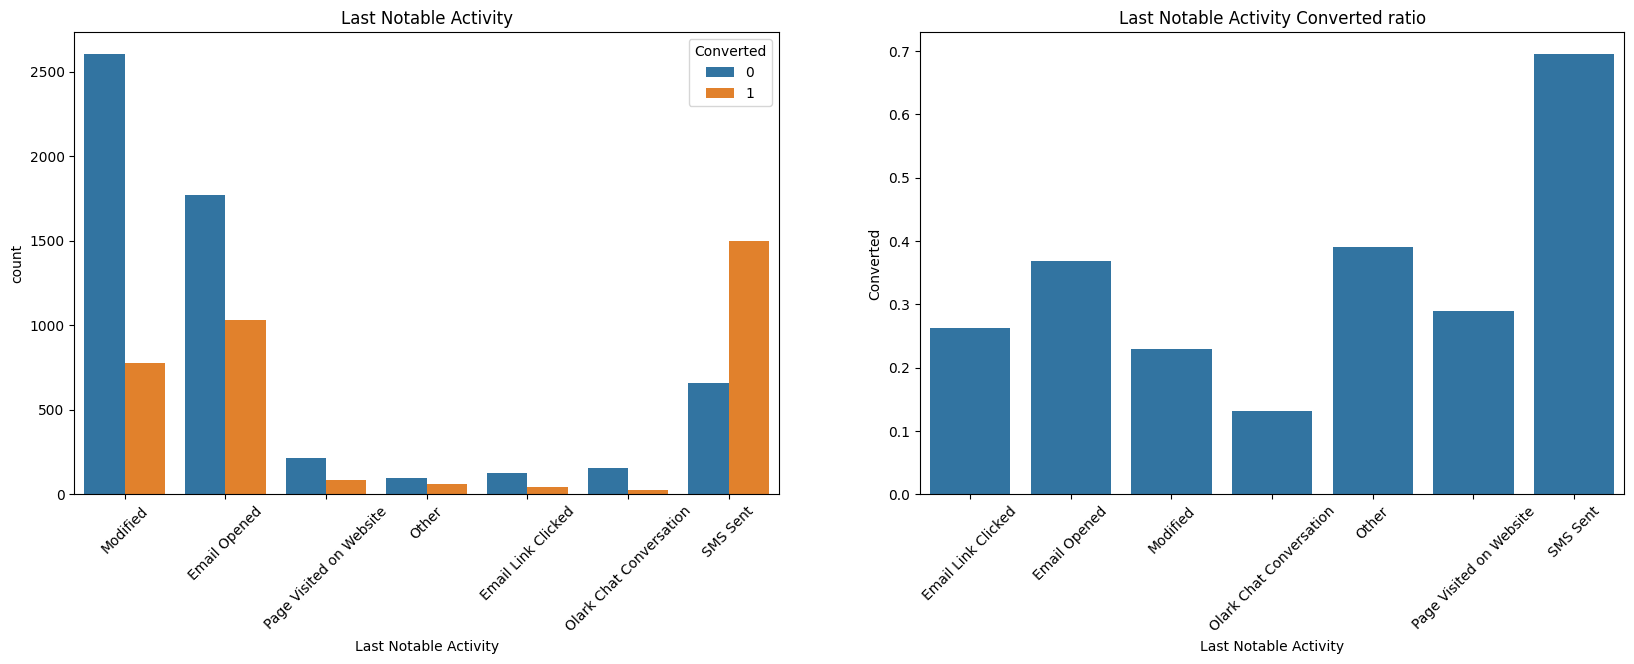

In [200]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=col, hue='Converted', data=df)
plt.title(col)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=converted_ratio(col, 'Converted', df).index, y=converted_ratio(col, 'Converted', df))
plt.title(col + ' Converted ratio')
plt.xticks(rotation=45)

As seen before, SMS is still the best way to reach for a lead and to convert it. In fact this may be because reaching out by phone is only done after a certain stage.

In [201]:
df.drop(to_drop, axis=1, inplace=True)

In [202]:
df.shape

(9149, 17)

## Data Transformation & Filtering

### Labelization

In this section, we will test the features, labels them and remove the ones we dont need

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9149 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9149 non-null   object 
 1   Lead Source                             9149 non-null   object 
 2   Do Not Email                            9149 non-null   object 
 3   Do Not Call                             9149 non-null   object 
 4   Converted                               9149 non-null   int64  
 5   TotalVisits                             9149 non-null   float64
 6   Total Time Spent on Website             9149 non-null   int64  
 7   Page Views Per Visit                    9149 non-null   float64
 8   Last Activity                           9149 non-null   object 
 9   Search                                  9149 non-null   object 
 10  Newspaper Article                       9149 non-null   object 
 

We treat the binary cols to map No to 0 and Yes to 1 (with respect to `Converted` convention)

In [204]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

for col in binary_cols:
    print(f'{col}: {df[col].unique()}')


Do Not Email: ['No' 'Yes']
Do Not Call: ['No' 'Yes']
Converted: [0 1]
Search: ['No' 'Yes']
Newspaper Article: ['No' 'Yes']
X Education Forums: ['No' 'Yes']
Newspaper: ['No' 'Yes']
Digital Advertisement: ['No' 'Yes']
Through Recommendations: ['No' 'Yes']
A free copy of Mastering The Interview: ['No' 'Yes']


In [205]:
map_binary_labels = {'No': 0, 'Yes': 1}

for col in binary_cols:
    if col != 'Converted':
        df[col] = df[col].map(map_binary_labels)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9149 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9149 non-null   object 
 1   Lead Source                             9149 non-null   object 
 2   Do Not Email                            9149 non-null   int64  
 3   Do Not Call                             9149 non-null   int64  
 4   Converted                               9149 non-null   int64  
 5   TotalVisits                             9149 non-null   float64
 6   Total Time Spent on Website             9149 non-null   int64  
 7   Page Views Per Visit                    9149 non-null   float64
 8   Last Activity                           9149 non-null   object 
 9   Search                                  9149 non-null   int64  
 10  Newspaper Article                       9149 non-null   int64  
 

We will label the categorical values

In [207]:
non_binary_cols = [col for col in df.columns if col not in binary_cols]

non_binary_categorical_cols = [col for col in non_binary_cols if df[col].dtype == 'object']

for col in non_binary_categorical_cols:
    print(f'{col}: {df[col].unique()}')

Lead Origin: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'Other']
Last Activity: ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Other' 'SMS Sent']
Last Notable Activity: ['Modified' 'Email Opened' 'Page Visited on Website' 'Other'
 'Email Link Clicked' 'Olark Chat Conversation' 'SMS Sent']


In [208]:
from sklearn.preprocessing import LabelEncoder

lead_origin_encoder = LabelEncoder()
df['Lead Origin'] = lead_origin_encoder.fit_transform(df['Lead Origin'])

lead_source_encoder = LabelEncoder()
df['Lead Source'] = lead_source_encoder.fit_transform(df['Lead Source'])

last_activity_encoder = LabelEncoder()
df['Last Activity'] = last_activity_encoder.fit_transform(df['Last Activity'])
''
last_notable_activity_encoder = LabelEncoder()
df['Last Notable Activity'] = last_notable_activity_encoder.fit_transform(df['Last Notable Activity'])

encoders = {
    'lead_origin_encoder': lead_origin_encoder,
    'lead_source_encoder': lead_source_encoder,
    'last_activity_encoder': last_activity_encoder,
    'last_notable_activity_encoder': last_notable_activity_encoder
}

for col in non_binary_categorical_cols:
    print(f'{col}: {df[col].unique()}')

Lead Origin: [0 1 2 3]
Lead Source: [2 3 0 1 6 7 5 4]
Last Activity: [7 3 9 0 5 1 2 4 6 8]
Last Notable Activity: [2 1 5 4 0 3 6]


### Feature correlation testing

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9149 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9149 non-null   int64  
 1   Lead Source                             9149 non-null   int64  
 2   Do Not Email                            9149 non-null   int64  
 3   Do Not Call                             9149 non-null   int64  
 4   Converted                               9149 non-null   int64  
 5   TotalVisits                             9149 non-null   float64
 6   Total Time Spent on Website             9149 non-null   int64  
 7   Page Views Per Visit                    9149 non-null   float64
 8   Last Activity                           9149 non-null   int64  
 9   Search                                  9149 non-null   int64  
 10  Newspaper Article                       9149 non-null   int64  
 

We only have numerical features now

In [210]:
X = df.drop('Converted', axis=1)
y = df['Converted']

In [211]:
from sklearn.feature_selection import f_classif, mutual_info_classif

anova_f, _ = f_classif(X, y)
mutual_info = mutual_info_classif(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA_F': anova_f,
    'Mutual_Info': mutual_info
})
print(feature_scores)

                                   Feature      ANOVA_F  Mutual_Info
0                              Lead Origin   492.769443     0.051980
1                              Lead Source   400.733641     0.056179
2                             Do Not Email   169.026616     0.012783
3                              Do Not Call     3.193510     0.001357
4                              TotalVisits    18.645409     0.004536
5              Total Time Spent on Website  1370.888246     0.118890
6                     Page Views Per Visit     0.086408     0.003829
7                            Last Activity   639.864548     0.085645
8                                   Search     0.046528     0.000000
9                        Newspaper Article     0.111345     0.000368
10                      X Education Forums     0.626463     0.000000
11                               Newspaper     0.626463     0.000000
12                   Digital Advertisement     0.308727     0.002716
13                 Through Recomme

- From the ANOVA test, we can tell that `Lead Origin`, `Lead Source`, `Do not Email`, `Total Time Spent on Wbesite`, `Last Activity` and `Last Notable Activity` are highly linearly correlated to the target variable. Which means we are most likely to keep those features.

- From the Mutual Information test, we can tell that most features have a low information score which means they all  have low non-linear relationships with the target variable.

From those test, I will consider removing `Do not Call`, `Page Views Per Visit`, `Search`,  `Newspaper Article`, `X Education Forums`, `Newspaper` and `Digital Advertisement`.

In [212]:
to_drop = ['Do Not Call', 'Page Views Per Visit', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement']
X = X.drop(to_drop, axis=1)

X.shape

(9149, 9)

In [213]:
X.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Last Activity,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,0,2,0,0.0,0,7,0,0,2
1,0,3,0,5.0,674,3,0,0,1
2,1,0,0,2.0,1532,3,0,1,1
3,1,0,0,1.0,305,9,0,0,2
4,1,1,0,2.0,1428,0,0,0,2


### Standardization & Normalization

In [214]:
X.describe()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Last Activity,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
count,9149.000000,9149.000000,9149.000000,9149.000000,9149.000000,9149.000000,9149.000000,9149.000000,9149.000000
mean,0.701607,1.576129,0.078369,3.220243,485.813204,4.836266,0.000765,0.310089,2.753197
std,0.634370,1.585082,0.268766,3.057123,547.623238,2.576523,0.027652,0.462555,1.993395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,10.000000,3.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,3.000000,247.000000,4.000000,0.000000,0.000000,2.000000
75%,1.000000,2.000000,0.000000,5.000000,932.000000,8.000000,0.000000,1.000000,5.000000
max,3.000000,7.000000,1.000000,20.000000,2272.000000,9.000000,1.000000,1.000000,6.000000


We will consider transforming `TotalVisits` and `Total Time Spent on Website` as we see different ranges and magnitudes

In [215]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)

### Train test split

In [216]:
from sklearn.model_selection import train_test_split

X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Machine Learning modelling

In [217]:
from sklearn.model_selection import GridSearchCV

In [218]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def plot_confusion_matrix(y_test: pd.Series, y_pred: np.ndarray) -> pd.DataFrame:
    """Plotsd the confusion matrix of a model"""
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def get_metrics(y_test: pd.Series, y_pred: np.ndarray) -> pd.DataFrame:
    """Returns the metrics of a model"""
    return pd.DataFrame({
        'Accuracy': [accuracy_score(y_test, y_pred)],
        'Precision': [precision_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)],
        'F1 Score': [f1_score(y_test, y_pred)],
        'ROC AUC': [roc_auc_score(y_test, y_pred)]
    })

1. **Precision**:
   $$
   \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
   $$
Precision measures the accuracy of positive predictions. It answers the question: *Of all the leads we predicted as "converted" (1), how many actually converted?*

2. **Recall**:
   $$
   \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
   $$
Recall measures the model's ability to find all the actual positives. It answers the question: *Of all the leads that actually converted (1), how many did we correctly predict as "converted"?*


- Maximizing Precision: We avoid wasting time on non-converted leads but risk missing some actual converted leads.

- Maximizing Recall: We capture more actual converted leads but spend more effort following up on non-converted leads.

**Business Strageties**:
- A lot of money: we can afford wasting time on more candidates if it means that we don't lose potential converted leads

- Fast pace: we can afford losing potential converted leads as we only focus on a smaller batch full of them.

### Logistic Regression

In [219]:
from sklearn.linear_model import LogisticRegression

lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

best_lr = GridSearchCV(LogisticRegression(), lr_params, cv=5, scoring='roc_auc')
best_lr.fit(X_train_scaled, y_train)

best_lr.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

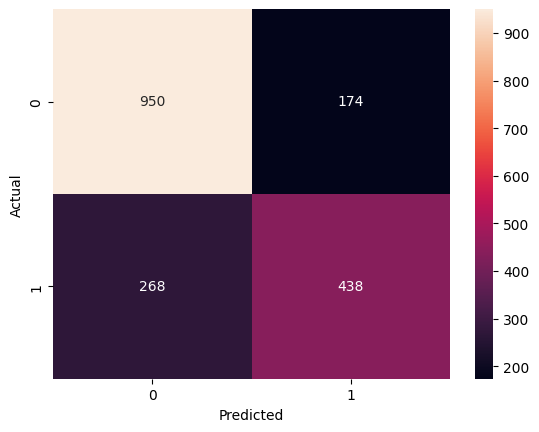

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1124
           1       0.72      0.62      0.66       706

    accuracy                           0.76      1830
   macro avg       0.75      0.73      0.74      1830
weighted avg       0.76      0.76      0.75      1830



In [220]:
plot_confusion_matrix(y_test, best_lr.predict(X_test_scaled))
print(classification_report(y_test, best_lr.predict(X_test_scaled)))


In [221]:
get_metrics(y_test, best_lr.predict(X_test_scaled))

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.75847,0.715686,0.620397,0.664643,0.732796


We get fairly good results but the f1 score is terrible due to a low recall for the class 1.

### KNN

#### With Scaled Values

In [222]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

best_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='roc_auc')
best_knn.fit(X_train_scaled, y_train)

best_knn.best_params_

{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

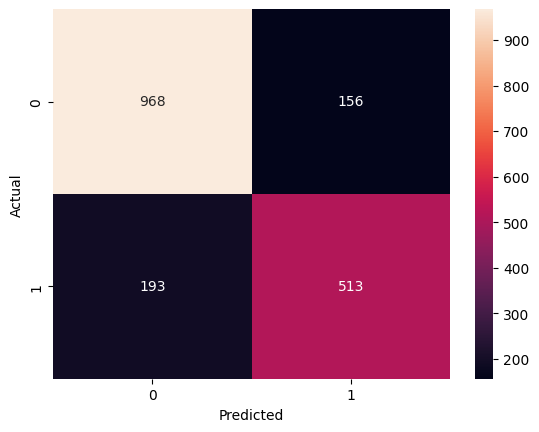

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1124
           1       0.77      0.73      0.75       706

    accuracy                           0.81      1830
   macro avg       0.80      0.79      0.80      1830
weighted avg       0.81      0.81      0.81      1830



In [223]:
plot_confusion_matrix(y_test, best_knn.predict(X_test_scaled))
print(classification_report(y_test, best_knn.predict(X_test_scaled)))

In [224]:
get_metrics(y_test, best_knn.predict(X_test_scaled))


,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.80929,0.766816,0.726629,0.746182,0.793919


#### With Normalized Values

In [225]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

best_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='roc_auc')
best_knn.fit(X_train_normalized, y_train)

best_knn.best_params_

{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

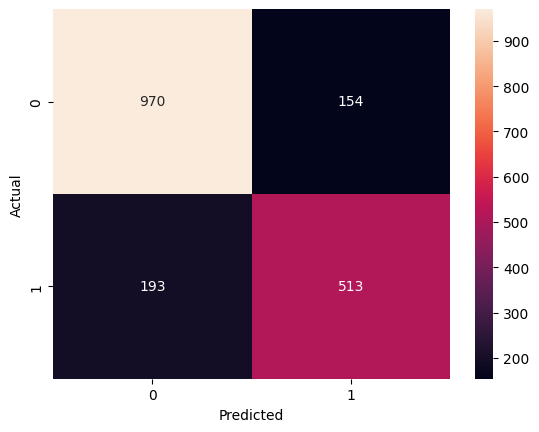

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1124
           1       0.77      0.73      0.75       706

    accuracy                           0.81      1830
   macro avg       0.80      0.79      0.80      1830
weighted avg       0.81      0.81      0.81      1830



In [226]:
plot_confusion_matrix(y_test, best_knn.predict(X_test_normalized))
print(classification_report(y_test, best_knn.predict(X_test_normalized)))

In [227]:
get_metrics(y_test, best_knn.predict(X_test_normalized))

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.810383,0.769115,0.726629,0.747269,0.794809


KNN seems to have much better results than Logistic Regression. For both Class 0 and Class 1, the model seems to have a high precision and recall which bumps the f1 score to .75.

Wether we use Normalized or Scaled data, we dont see any particular difference

###  Support Vector Classifier

In [228]:
from sklearn.svm import SVC

svc_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

best_svm = GridSearchCV(SVC(), svc_params, cv=5, scoring='roc_auc')
best_svm.fit(X_train_scaled, y_train)

best_svm.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

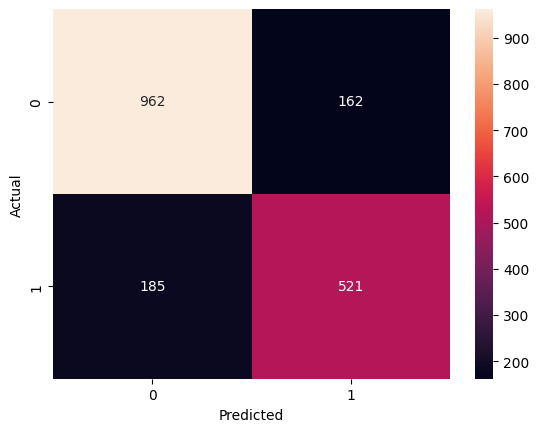

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1124
           1       0.76      0.74      0.75       706

    accuracy                           0.81      1830
   macro avg       0.80      0.80      0.80      1830
weighted avg       0.81      0.81      0.81      1830



In [229]:
plot_confusion_matrix(y_test, best_svm.predict(X_test_scaled))
print(classification_report(y_test, best_svm.predict(X_test_scaled)))

In [230]:
get_metrics(y_test, best_svm.predict(X_test_scaled))

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.810383,0.762811,0.73796,0.75018,0.796916


### Random Forest

In [231]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

best_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='roc_auc')
best_rf.fit(X_train_scaled, y_train)

best_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

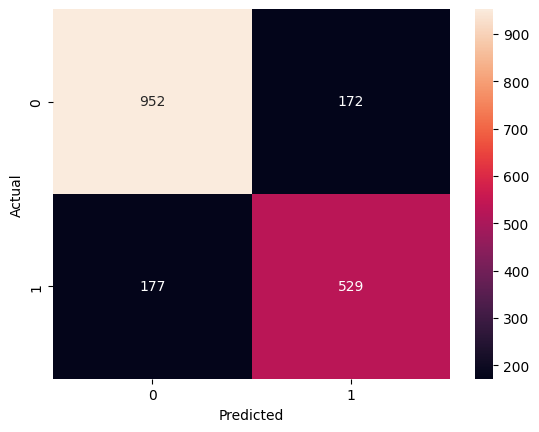

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1124
           1       0.75      0.75      0.75       706

    accuracy                           0.81      1830
   macro avg       0.80      0.80      0.80      1830
weighted avg       0.81      0.81      0.81      1830



In [232]:
plot_confusion_matrix(y_test, best_rf.predict(X_test_scaled))
print(classification_report(y_test, best_rf.predict(X_test_scaled)))

In [233]:
get_metrics(y_test, best_rf.predict(X_test_scaled))

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.80929,0.754636,0.749292,0.751955,0.798133


## Neural Networks

In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [235]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

In [236]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['recall', 'precision'])

In [237]:
ealy_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [238]:
model.fit(X_train_normalized, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[ealy_stop])

Epoch 1/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6109 - precision: 0.6369 - recall: 0.3320 - val_loss: 0.6284 - val_precision: 0.7332 - val_recall: 0.6346
Epoch 2/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4812 - precision: 0.7311 - recall: 0.6876 - val_loss: 0.6217 - val_precision: 0.7369 - val_recall: 0.6983
Epoch 3/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4847 - precision: 0.7239 - recall: 0.6867 - val_loss: 0.6718 - val_precision: 0.7212 - val_recall: 0.7550
Epoch 4/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4601 - precision: 0.7395 - recall: 0.7364 - val_loss: 0.7940 - val_precision: 0.6187 - val_recall: 0.7677
Epoch 5/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4549 - precision: 0.7474 - recall: 0.7375 - val_loss: 0.9101 - val_precision: 0.5816 - val_recall: 0.8130
Epoch 6/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4479 - precision: 0.7518 - recall: 0.7469 - val_loss: 0.9754 - val_precision: 0.5765 - val_r

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


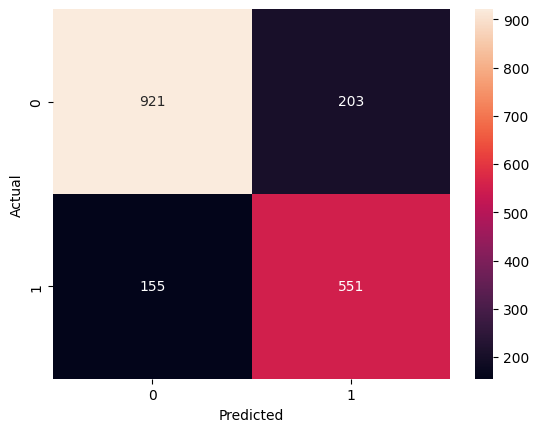

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1124
           1       0.73      0.78      0.75       706

    accuracy                           0.80      1830
   macro avg       0.79      0.80      0.80      1830
weighted avg       0.81      0.80      0.81      1830



In [239]:
predict_x=model.predict(X_test_normalized)
classes_x=np.round(predict_x)

plot_confusion_matrix(y_test, classes_x)
print(classification_report(y_test, classes_x))

In [240]:
get_metrics(y_test, classes_x)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.804372,0.730769,0.780453,0.754795,0.799924


## Results

In [241]:
lr_metrics = get_metrics(y_test, best_lr.predict(X_test_scaled))
knn_metrics = get_metrics(y_test, best_knn.predict(X_test_scaled))
svm_metrics = get_metrics(y_test, best_svm.predict(X_test_scaled))
rf_metrics = get_metrics(y_test, best_rf.predict(X_test_scaled))
nn_metrics = get_metrics(y_test, classes_x)

<ipython-input-242-8f7a81000948>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-242-8f7a81000948>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-242-8f7a81000948>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-242-8f7a81000948>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-242-8f7a81000948>:11: UserWarning: set_ticklabels() should only be us

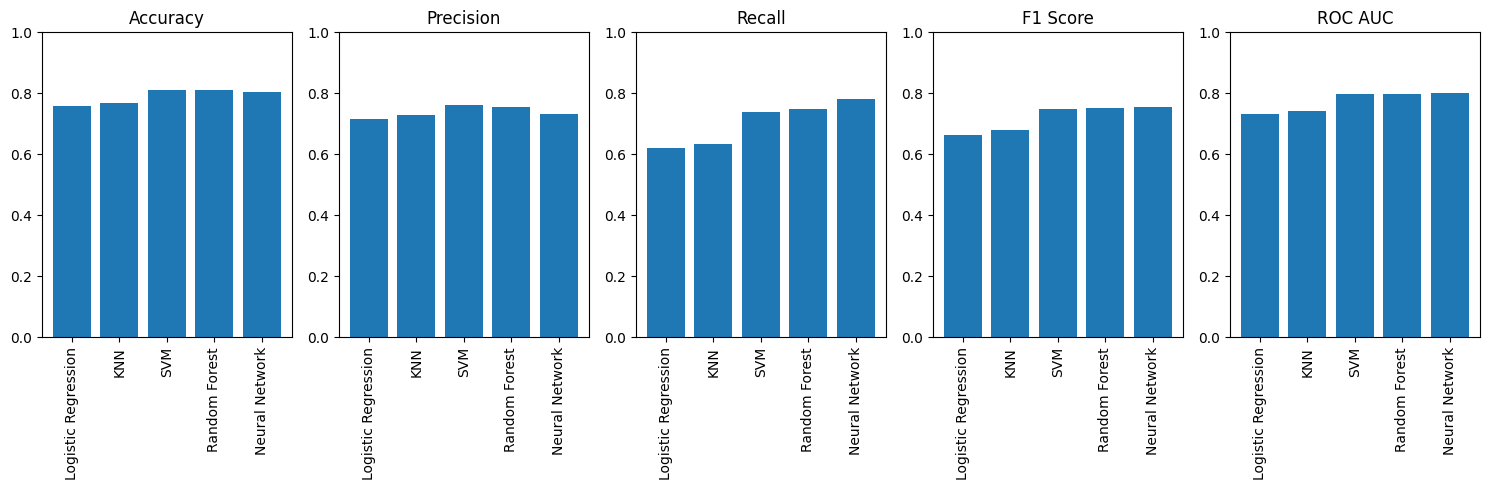

In [242]:
# we plot the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

fig, axs = plt.subplots(1, len(metrics), figsize=(15, 5))

for i, metric in enumerate(metrics):
    axs[i].bar(['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Neural Network'],
               [lr_metrics[metric][0], knn_metrics[metric][0], svm_metrics[metric][0], rf_metrics[metric][0], nn_metrics[metric][0]])
    axs[i].set_title(metric)
    axs[i].set_ylim(0, 1)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

From this plot, we can clearly see that 3 models have better results overall than the others.
In fact, `SVM`, `Random Forest` and our `Neural Network` all have similar results. Which one should we consider ?

In [243]:
print(classification_report(y_test, best_svm.predict(X_test_scaled)))
print(classification_report(y_test, best_rf.predict(X_test_scaled)))
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1124
           1       0.76      0.74      0.75       706

    accuracy                           0.81      1830
   macro avg       0.80      0.80      0.80      1830
weighted avg       0.81      0.81      0.81      1830

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1124
           1       0.75      0.75      0.75       706

    accuracy                           0.81      1830
   macro avg       0.80      0.80      0.80      1830
weighted avg       0.81      0.81      0.81      1830

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1124
           1       0.73      0.78      0.75       706

    accuracy                           0.80      1830
   macro avg       0.79      0.80      0.80      1830
weighted avg       0.81      0.80      0.81      1830



The choice will depend on the inference time of each model.

In [244]:
from time import time

now = time()
for i in range(100):
    lr_pred = best_lr.predict(X_test_scaled[:100])
elapsed_time = time() - now
print(f"Mean inference time per 100 rows for Support Vector Classifier: {(elapsed_time / 100):.6f} seconds")

Mean inference time per 100 rows for Support Vector Classifier: 0.000262 seconds


In [245]:
now = time()
for i in range(100):
    rf_pred = best_rf.predict(X_test_scaled[:100])
elapsed_time = time() - now
print(f"Mean inference time per 100 rows for Random Forest: {(elapsed_time / 100):.6f} seconds")

Mean inference time per 100 rows for Random Forest: 0.017380 seconds


In [246]:
now = time()
for i in range(100):
    np.round(model.predict(X_test_normalized[:100]))
elapsed_time = time() - now
print(f"Mean inference time per 100 rows for Neural Network: {(elapsed_time / 100):.6f} seconds")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━

We will use our SVC model

In [260]:
import joblib

joblib.dump(best_svm, 'best_svm.joblib')

for key, encoder in encoders.items():
    joblib.dump(encoder, f'{key}.joblib')

joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']